In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv
/kaggle/input/sales-data-bootcamp/sales_data_sample.csv


# Step1: Setting up the Environment And Data Loading
**Load the Data and Importing Necessary Libraries:**
* Find the dataset on Kaggle, Click on "New Notebook" to get the dataset file.
* Import Python libraries like Pandas, Matplotlib, Seaborn to read the dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read / Load the Data:**
* The dataset is loaded using pd.read_excel().
* encoding='latin1': Specifies the character encoding scheme to use when reading the CSV file. latin1 is a commonly used encoding for files with special characters.

In [3]:
df =pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',encoding='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


 **Another way of loading data**
* Download Dataset: Find the dataset on Kaggle. Click on "Download" to get the dataset file (usually in CSV or other formats).
* Upload to Notebook: In Jupyter Notebook, use the "Upload" button to upload the dataset file you downloaded from Kaggle.
* Read Dataset: Use Python libraries like Pandas to read the dataset into notebook using commands like pd.read_csv('filename.csv'). 

In [4]:
df =pd.read_csv('/kaggle/input/sales-data-bootcamp/sales_data_sample.csv',encoding='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# Step 2: Data Exploration
To display the first few rows of the DataFrame(df) use **df.head()**, providing a quick overview of its structure and content.

In [5]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


To display the last few rows of the DataFrame (df) and see the end part of the dataset, use **df.tail()**. It's useful for quickly checking the final records in the data.

In [6]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


The **df.info()** provides a concise summary of the DataFrame (df), showing information such as the number of entries (rows), number of columns, column names, data types, and memory usage. It's useful for understanding the structure and characteristics of the dataset at a glance.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


The **df.describe()** generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. It includes count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns in the DataFrame df. This method provides a quick overview of the data's statistical summary.

In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**value_counts()** is a method in Pandas that counts the occurrences of unique values in a Series. It returns a Series containing counts of unique values, sorted in descending order by default. This method is useful for understanding the distribution of categorical data and identifying the most common values in a column.

In [9]:
df.value_counts
data= pd.DataFrame(df.value_counts())
data

count
ORDERNUMBER QUANTITYORDERED PRICEEACH ORDERLINENUMBER SALES   ORDERDATE       STATUS     QTR_ID MONTH_ID YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE CUSTOMERNAME               PHONE           ADDRESSLINE1                            ADDRESSLINE2 CITY         STATE    POSTALCODE COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE       
10120       22              100.00    6               2461.36 4/29/2003 0:00  Shipped    2      4        2003    Motorcycles      99   S32_1374    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10361       34              100.00    6               3871.92 12/17/2004 0:00 Shipped    4      12       2004    Vintage Cars     65   S24_3420    Souveniers And Things Co.  +61 2 9495 8555 Monitor Money Building, 815 Pacific Hwy Level 6      Chatswood    NSW      2067       Australia APAC      Huxley          Adrian           Medium        1
10347       30              100.00    1               3944.70 11/29/2004 0:00 Shipped    4      11       2004    Classic Cars     214  S10_1949    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Medium        1
            34              64.96     10              2208.64 11/29/2004 0:00 Shipped    4      11       2004    Vintage Cars     62   S18_2957    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
            42              49.60     5               2083.20 11/29/2004 0:00 Shipped    4      11       2004    Trucks and Buses 116  S18_1097    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
...                                                                                                                                                                                                                                                                                                                                                  ...
10169       38              68.39     8               2598.82 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      62   S18_3782    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
                            74.11     11              2816.18 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      69   S24_2360    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Small         1
            48              80.55     10              3866.40 11/4/2003 0:00  Shipped    4      11       2003    Motorcycles      81   S50_4713    Anna's Decorations, Ltd    02 9936 8555    201 Miller Street                       Level 15     North Sydney NSW      2060       Australia APAC      O'Hara          Anna             Medium        1
10223       20              66.04     12              1320.80 2/20/2004 0:00  Shipped    1      2        2004    Vintage Cars     68   S32_4289    Australian Collectors, Co. 03 9520 4555    636 St Kilda Road                       Level 3      Melbourne    Victoria 3004       Australia APAC      Ferguson        Peter            Small         1
10420       66              92.95     6               6134.70 5/29/2005 0:00  In Process 2      5        2005    Vintage Cars     92   S18_4409    Souveniers And Things Co.  +61 2 9495 8555 Monitor M

The **df.dtypes** is an attribute in Pandas DataFrame that returns the data type of each column. It is useful for understanding the type of data stored in each column, which can include integers, floats, strings (object), datetime objects, and categorical types among others.

In [10]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

The **df.columns** is an attribute in Pandas DataFrame that returns the column labels of the DataFrame. It provides a list of column names, which is useful for accessing, manipulating, or iterating over columns in the DataFrame.

In [11]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

The **df.shape** attribute in Pandas DataFrame returns a tuple representing the dimensions of the DataFrame. It returns the number of rows and columns in the DataFrame in the format (rows, columns)

In [12]:
df.shape

(2823, 25)

The **pd.options.display.max_row** in Pandas is a setting that controls the maximum number of rows Pandas will display when a DataFrame is printed. By default, it is set to 60. You can modify this setting to control how many rows are displayed, particularly useful when dealing with large DataFrames. For example, setting **pd.options.display.max_rows = 100** will display up to 100 rows of a DataFrame when printed.

In [13]:
pd.options.display.max_rows

60

In [14]:
d=pd.options.display.max_rows=100
d

100

The **df.isnull().sum()** is used to count the number of missing values (NaN) in each column of the DataFrame df. It returns a Series where each column name is mapped to the count of its missing values. This is useful for identifying which columns have missing data that may need to be handled or imputed before further analysis.

In [15]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Step 3: Data Cleaning


The code **df['TERRITORY'].hist()** is used to plot a histogram of the values in the 'TERRITORY' column of the DataFrame df. This visualization helps to quickly check the distribution and frequency of different values within the 'TERRITORY' column, which can reveal any anomalies or unexpected values that may indicate data mismatch or errors.

<Axes: >

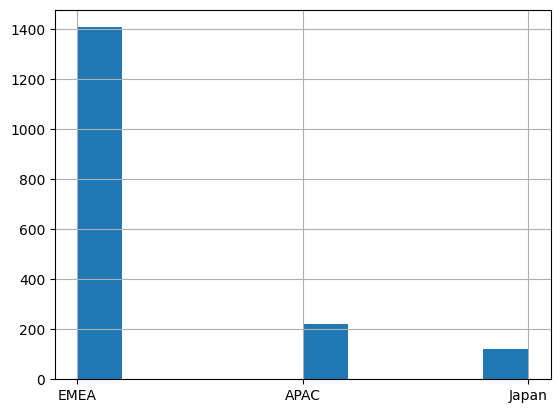

In [16]:
df['TERRITORY'].hist()

To create a summarized view of the TERRITORY values grouped by 'COUNTRY' from the original DataFrame df. This involves the following steps:
1. Selecting Specific Columns: The code selects only the COUNTRY and TERRITORY columns from the original DataFrame df.
2. Grouping by Country: It groups the data by the 'COUNTRY' column.
3. Aggregating Territories: For each unique 'COUNTRY', it aggregates the corresponding 'TERRITORY' values into lists.
This results in a new DataFrame where each row represents a unique country and the territories associated with that country which are combined into a list. This can be useful for understanding the distribution of territories within each country and performing further analysis or reporting.

The code below **df_region = df[["COUNTRY", "TERRITORY"]]** creates a new DataFrame df_region that includes only the columns 'COUNTRY' and 'TERRITORY' from the original DataFrame df.

The code **df_grouped = df_region.groupby("COUNTRY").agg(list)** groups the data in df_region by unique values in the 'COUNTRY' column. It aggregates the corresponding 'TERRITORY' values for each country into lists, resulting in a DataFrame df_grouped where each row represents a unique country and the 'TERRITORY' column contains lists of territories associated with each country.

In [17]:
df_region= df[["COUNTRY", "TERRITORY"]]
df_grouped= df_region.groupby("COUNTRY").agg(list)

df_grouped

,TERRITORY
COUNTRY,
Australia,"[APAC, APAC, APAC, APAC, APAC, APAC, APAC, APA..."
Austria,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
Belgium,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
Canada,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
Denmark,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
Finland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
France,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
Germany,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
Ireland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."


For handling missing data in the dataset, providing a default value where actual data is not available, 
The code **df['TERRITORY'] = df['TERRITORY'].fillna('North America')** fills missing values (NaNs) in the 'TERRITORY' column of the DataFrame df with the string 'North America'. This operation ensures that any cells in the 'TERRITORY' column that do not have a value will be replaced with 'North America'. 

In [18]:
#filling the nan values
df['TERRITORY']=df['TERRITORY'].fillna('North America')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


The code **df['TERRITORY'] = df['TERRITORY'].replace('Japan', 'APAC')** replaces all occurrences of 'Japan' in the 'TERRITORY' column with 'APAC'. This means that any row in the 'TERRITORY' column that originally had the value 'Japan' will now have the value 'APAC'.

In [19]:
df['TERRITORY'] = df['TERRITORY'].replace('Japan', 'APAC')
df['TERRITORY']

0       North America
1                EMEA
2                EMEA
3       North America
4       North America
            ...      
2818             EMEA
2819             EMEA
2820             EMEA
2821             EMEA
2822    North America
Name: TERRITORY, Length: 2823, dtype: object

* This histogram is created to visualize and compare the distribution of values in the TERRITORY column before and after the missing values are filled.


<Axes: >

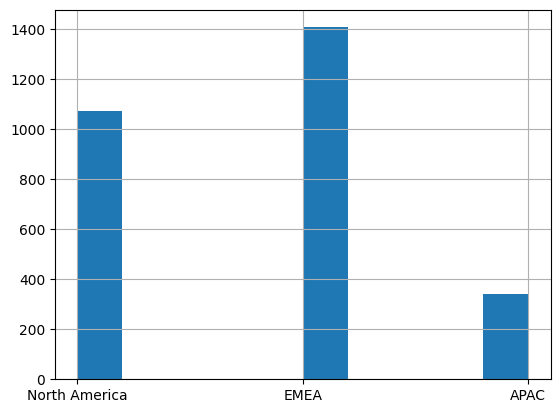

In [20]:
df['TERRITORY'].hist()

* To find out missing values in the columns ADDRESSLINE1 and ADDRESSLINE2 of the DataFrame df.
* The code **df_ADDRESSLINE1 = df[["ADDRESSLINE1", "ADDRESSLINE2"]]** creates a new DataFrame df_ADDRESSLINE1 containing only the columns 'ADDRESSLINE1' and 'ADDRESSLINE2' from the original DataFrame df. 

In [21]:
df_ADDRESSLINE1= df[["ADDRESSLINE1", "ADDRESSLINE2"]]
df_ADDRESSLINE1

,ADDRESSLINE1,ADDRESSLINE2
0,897 Long Airport Avenue,NaN
1,59 rue de l'Abbaye,NaN
2,27 rue du Colonel Pierre Avia,NaN
3,78934 Hillside Dr.,NaN
4,7734 Strong St.,NaN
...,...,...
2818,"C/ Moralzarzal, 86",NaN
2819,Torikatu 38,NaN
2820,"C/ Moralzarzal, 86",NaN
2821,1 rue Alsace-Lorraine,NaN


* To identify and manage missing values and checking how ADDRESSLINE2 corresponds to each ADDRESSLINE1.
* The code **df_grouped = df_ADDRESSLINE1.groupby("ADDRESSLINE1").agg(list)** groups the data by the 'ADDRESSLINE1' column and aggregates the 'ADDRESSLINE2' values into lists for each unique 'ADDRESSLINE1' value. This means that for each unique address in 'ADDRESSLINE1', gets a list of corresponding 'ADDRESSLINE2' values. This operation is useful for organizing and summarizing data based on common values in one column while collecting related values from another column 

In [22]:
df_grouped= df_ADDRESSLINE1.groupby("ADDRESSLINE1").agg(list)
df_grouped

,ADDRESSLINE2
ADDRESSLINE1,
1 rue Alsace-Lorraine,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
11328 Douglas Av.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
"12, rue des Bouchers","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
120 Hanover Sq.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
15 McCallum Street - NatWest Center #13-03,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
16780 Pompton St.,"[nan, nan, nan, nan, nan, nan, nan, nan]"
1785 First Street,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
"184, chausse de Tournai","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1900 Oak St.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [23]:
#  Fill missing values in 'ADDRESSLINE2' with a placeholder
df['ADDRESSLINE2'].fillna('N/A')

0       N/A
1       N/A
2       N/A
3       N/A
4       N/A
       ... 
2818    N/A
2819    N/A
2820    N/A
2821    N/A
2822    N/A
Name: ADDRESSLINE2, Length: 2823, dtype: object

The histogram shows a high frequency of 'N/A' values in the 'ADDRESSLINE2' column, suggesting that this field might not be relevant for many entries. This indicates the column may be less significant and has more potential to be excluded from analysis if it does not contribute valuable information.

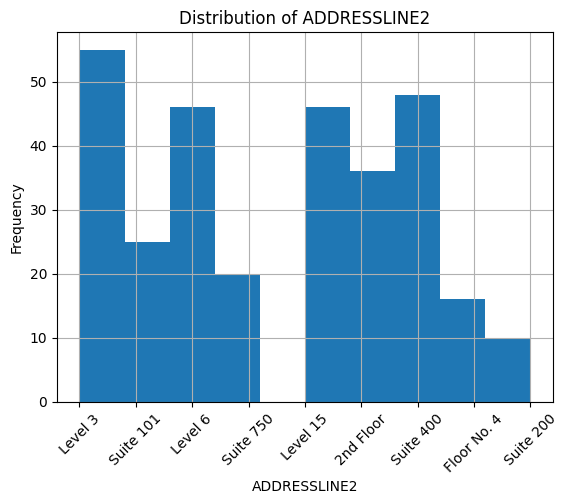

In [24]:
# Plot histogram if ADDRESSLINE2 is numerical
df['ADDRESSLINE2'].hist()
plt.title('Distribution of ADDRESSLINE2')
plt.xlabel('ADDRESSLINE2')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

To examine how many different states and cities are associated with each postal code which helps in understanding the geographical distribution and grouping of data based on postal codes.

In [25]:
df_STATE= df[["STATE","POSTALCODE", "CITY"]]
df_grouped= df_STATE.groupby("POSTALCODE").agg(list)

df_grouped

,STATE,CITY
POSTALCODE,,
10022,"[NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, NY, N...","[NYC, NYC, NYC, NYC, NYC, NYC, NYC, NYC, NYC, ..."
10100,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Torino, Torino, Torino, Torino, Torino, Torin..."
106-0032,"[Tokyo, Tokyo, Tokyo, Tokyo, Tokyo, Tokyo, Tok...","[Minato-ku, Minato-ku, Minato-ku, Minato-ku, M..."
1203,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Gensve, Gensve, Gensve, Gensve, Gensve, Gensv..."
1227 MM,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Makati City, Makati City, Makati City, Makati..."
13008,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Marseille, Marseille, Marseille, Marseille, M..."
1734,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Kobenhavn, Kobenhavn, Kobenhavn, Kobenhavn, K..."
2,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[Dublin, Dublin, Dublin, Dublin, Dublin, Dubli..."
2060,"[NSW, NSW, NSW, NSW, NSW, NSW, NSW, NSW, NSW, ...","[North Sydney, North Sydney, North Sydney, Nor..."


For isolating and examining rows with missing data, which can be essential for data cleaning and preprocessing steps in data analysis. By creating **df_null**, we have to address any issues related to missing values.
* df.isnull().any(axis=1) generates a boolean Series where each element is True if any value in that row is NaN (missing), and False otherwise.
* df[df.isnull().any(axis=1)] uses this boolean Series to filter the original DataFrame, keeping only the rows where at least one value is missing.

In [26]:
df_null=df[df.isnull().any(axis=1)] # axis=1 means the operation is performed across columns for each row.
df_null

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


Here, we can see from the above table, the 'STATE' column has missing values (NaN). To find out the missing values available in the 'STATE' column, we use **df[df['STATE'].isnull()]**
This code filters the original DataFrame (df) to select rows where the 'STATE' column contains NaN, effectively isolating records with missing 'STATE' information for further inspection or correction.

In [27]:
df_null = df[df['STATE'].isnull()]
df_null

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,10327,37,86.74,4,3209.38,11/10/2004 0:00,Resolved,4,11,2004,...,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Medium
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium


In [28]:
# To find colum of null values
df_null = df.columns[df.isnull().any()].tolist()
df_null

['ADDRESSLINE2', 'STATE', 'POSTALCODE']

In [29]:
df_null = df.columns[df.isna().any()].tolist()
df_with_null=df[df_null]
df_with_null

,ADDRESSLINE2,STATE,POSTALCODE
0,NaN,NY,10022
1,NaN,NaN,51100
2,NaN,NaN,75508
3,NaN,CA,90003
4,NaN,CA,NaN
...,...,...,...
2818,NaN,NaN,28034
2819,NaN,NaN,90110
2820,NaN,NaN,28034
2821,NaN,NaN,31000


In [30]:
#  Fill missing values in 'STATE' & 'POSTALCODE' with a placeholder
df['STATE'].fillna('Unknown')
df['POSTALCODE'].fillna('Unknown')

0         10022
1         51100
2         75508
3         90003
4       Unknown
         ...   
2818      28034
2819      90110
2820      28034
2821      31000
2822      51003
Name: POSTALCODE, Length: 2823, dtype: object

In [31]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [32]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium


# Step 4: Data Visualization

1. Use Seaborn and Matplotlib to create a line plot visualizing sales data over time.

The line plot below shows visualisation sales over time. It uses Seaborn's lineplot to plot sales (SALES) against months (MONTH_ID) with a green line. The plot is customized with titles and labels for the axis, and a grid is added for better readability. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


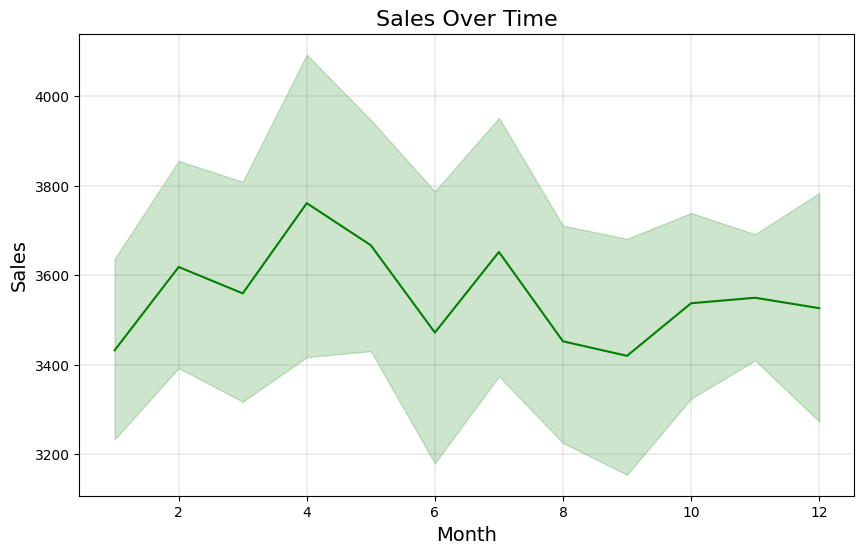

In [33]:
# Create figure and axis
plt.figure(figsize=(10, 6))  
ax = plt.gca()

# Plotting using Seaborn's lineplot
sns.lineplot(x='MONTH_ID', y='SALES', data=df, ax=ax, color='Green')

# Customize labels and title
ax.set_title('Sales Over Time', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Sales', fontsize=14)
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.2)
plt.show()

This line plot shows visualisation of sales data across different years. It plots SALES against YEAR_ID with blue markers and dashed lines,

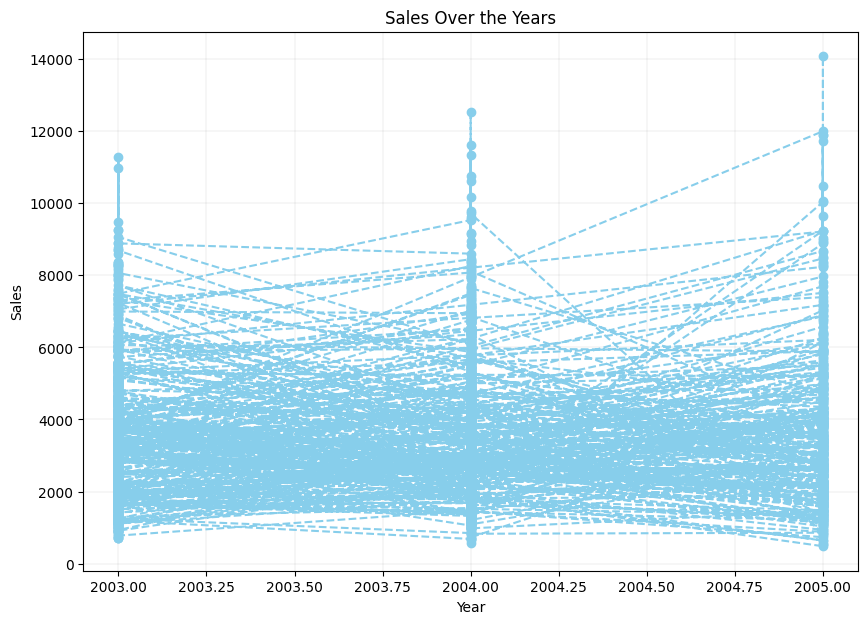

In [34]:
# Assuming df is your DataFrame with 'YEAR_ID' and 'SALES' columns
plt.figure(figsize=(10, 7)) 

# Plotting the line plot
plt.plot(df['YEAR_ID'], df['SALES'], marker='o', linestyle='--', color='skyblue', label='Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Over the Years')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

Here is another way to visualize data using a pivot table. The code creates a pivot table to summarize the total sales for each year, aggregating the SALES values by YEAR_ID using the sum function. Afterward, the pivot table is reset to convert the index back into a column, facilitating easier access and further analysis.

In [35]:
pivot_table_sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='YEAR_ID',
    aggfunc='sum')
pivot_table_sales.reset_index()

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


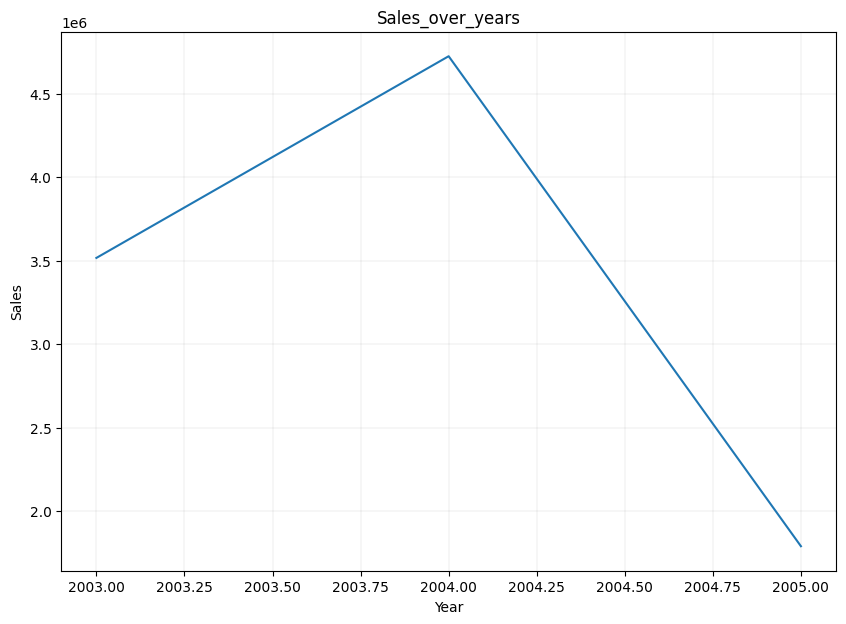

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(x='YEAR_ID',y='SALES',data=pivot_table_sales)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales_over_years')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()

2.	Visualize the distribution of sales across different regions:

we can use a variety of plots.
a) Box plot: A box plot is a great option as it shows the distribution of sales data, highlighting the median, quartiles, and potential outliers across different regions.

In [37]:
df[['TERRITORY', 'SALES']].head()

,TERRITORY,SALES
0,North America,2871.00
1,EMEA,2765.90
2,EMEA,3884.34
3,North America,3746.70
4,North America,5205.27


Let’s break down the box plot to understand:
* Median (Q2): The line inside each box shows the middle value of those numbers. It’s like finding the “average” sales amount for that region.

* Quartiles (Q1 and Q3): The box itself represents the middle 50% of sales. The lower edge of the box (Q1) is where the 25% lowest sales values are, and the upper edge (Q3) is where the 75% highest sales values are.

* Outliers: Any points outside the whiskers (those lines extending from the box) are potential outliers—sales figures that are unusually high or low compared to the rest.
So, the box plot helps us see how sales are spread out across different regions!

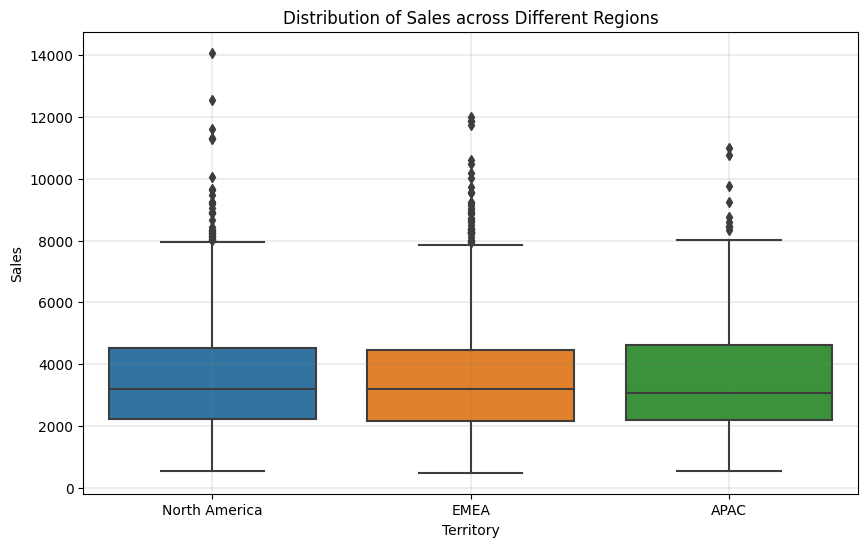

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TERRITORY', y='SALES', data=df)
plt.xlabel('Territory')
plt.ylabel('Sales')
plt.title('Distribution of Sales across Different Regions')
plt.xticks(rotation=0)
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.2)
plt.show()

b) Pie chart: A pie chart is like a circular pizza divided into slices. Each slice represents a part of the whole (like different flavors of pizza). The size of each slice shows its proportion. So, pie charts help us see how things are divided! 

In [39]:
# Aggregate sales by region
sales_by_region = df.groupby('TERRITORY')['SALES'].sum()
sales_by_region.reset_index()

,TERRITORY,SALES
0,APAC,1201295.05
1,EMEA,4979272.41
2,North America,3852061.39


This pie chart represents sales distribution across different regions,
* North America (38.4%): This slice represents the proportion of sales from North America. It’s the largest slice, indicating that North America contributes the most to the overall sales.
* EMEA (Europe, the Middle East, and Africa) (49.6%): The EMEA slice is the second largest. It shows that this region accounts for nearly half of the total sales.
* APAC (Asia-Pacific) (12.0%): The smallest slice represents APAC. It contributes the least to the overall sales volume.

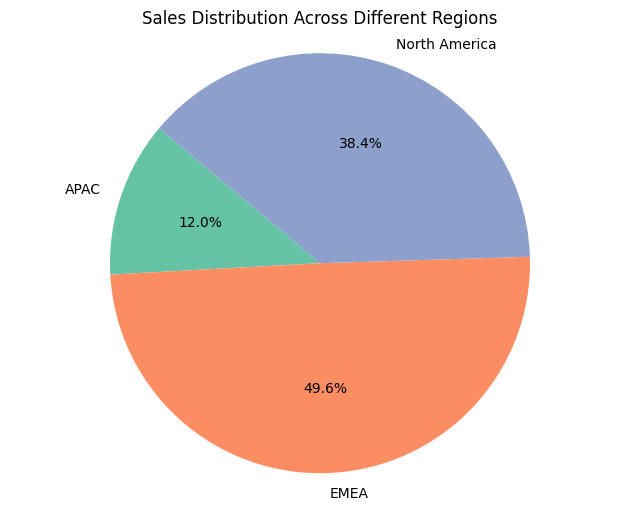

In [40]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=140,colors=('#66c2a5', '#fc8d62', '#8da0cb'))
plt.title('Sales Distribution Across Different Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

c) Bar chart by using pivot table:

In [41]:
pivot_table_terr = pd.pivot_table(
    data=df,
    values='SALES',
    index='TERRITORY',
    aggfunc='sum')
pivot_table_terr.reset_index()

,TERRITORY,SALES
0,APAC,1201295.05
1,EMEA,4979272.41
2,North America,3852061.39


The bar chart Of “Total Sales Per Region” shows:
* North America: The bar for North America represents the sales in that region. It’s slightly shorter than the EMEA bar.
* EMEA (Europe, the Middle East, and Africa): The EMEA bar is the tallest, indicating the highest sales volume among the three regions.
* APAC (Asia-Pacific): The shortest bar represents sales in the APAC region.

In summary, this chart visually compares sales across North America, EMEA, and APAC. EMEA dominates in terms of sales! 

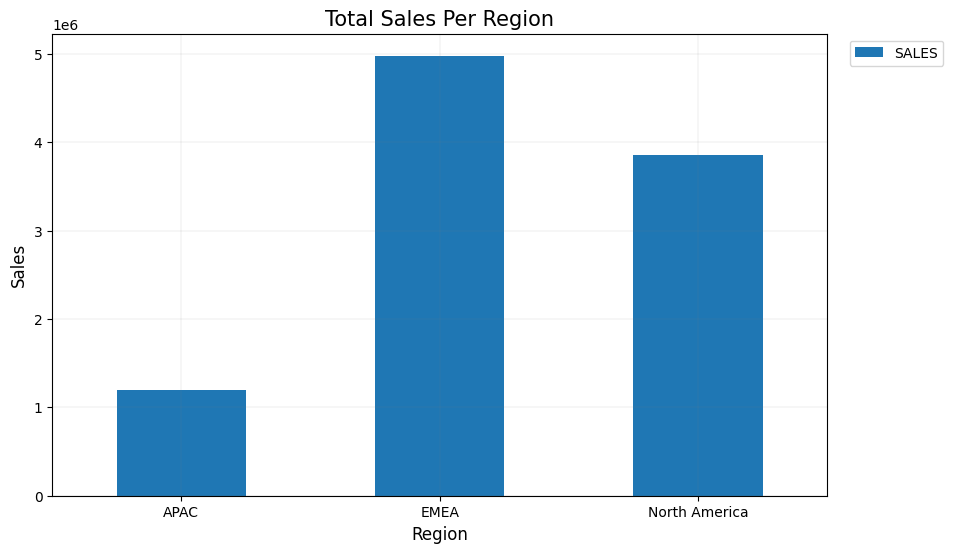

In [42]:
pivot_table_terr.plot(kind='bar', figsize=(10,6))
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title("Total Sales Per Region", fontsize=15)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()

3.	Create a bar plot to visualize the sales distribution across different products.
To create a bar plot visualizing the sales distribution across different products,
* Group the sales data by product and sum the sales for each product.
* Sort the data for better visualization

In [43]:
# Aggregate sales by product
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
sales_by_product

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


In [44]:
# Sort the data for better visualization
sales_by_product = sales_by_product.sort_values(by='SALES', ascending=False)
sales_by_product 

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
6,Vintage Cars,1903150.84
1,Motorcycles,1166388.34
5,Trucks and Buses,1127789.84
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47


This horizontal bar chart titled “Sales Distribution Across Different Products” shows:

* Classic Cars: The longest bar corresponds to classic cars. It suggests that classic cars have the highest sales volume among the listed products.
* Vintage Cars: The bar for vintage cars is shorter than classic cars, indicating moderate sales.
* Motorcycles: The bar for motorcycles is shorter than vintage cars but longer than trucks and buses. It shows moderate sales for this product category.
* Trucks and Buses: The bar slightly shorter than motorcycles represents sales that are nearly similar for both trucks and buses and motorcycles.
* Planes, Ships, and Trains: These three categories have very short bars, suggesting minimal sales compared to the other products.

In summary, this chart visually represents sales data across different product lines, highlighting the popularity of classic cars and the lower sales of  planes, ships, and trains.

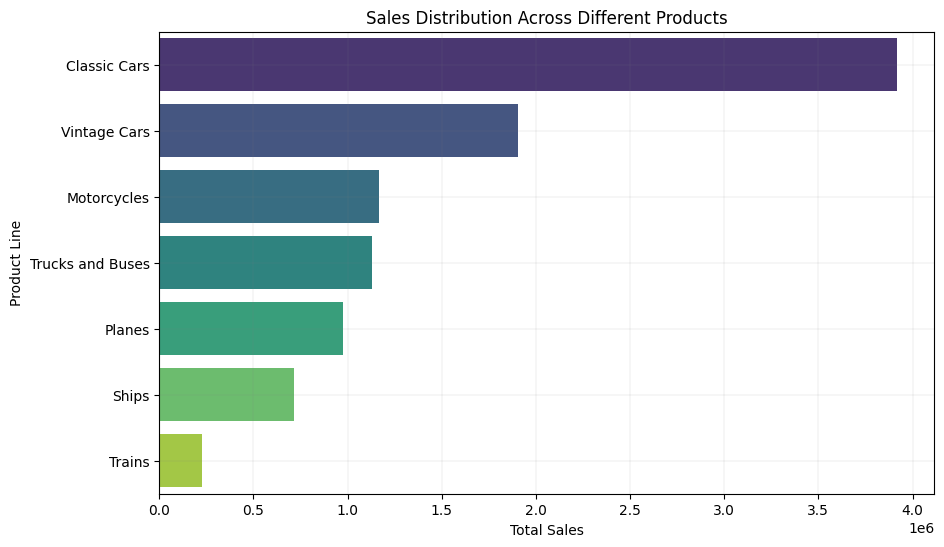

In [45]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='SALES', y='PRODUCTLINE', data=sales_by_product, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.title('Sales Distribution Across Different Products')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()

4.	Create a scatter plot to visualize the relationship between sales and dealsize.

Lets see two variations of scatter plots for Dealsize :

a) In this scatter plot,
Each dot represents an individual sales deal. The vertical position of the dots indicates the sales value (ranging from 0 to 14,000). We have three distinct clusters of dots corresponding to the three deal size categories.

* Small Deals: The cluster for small deals is concentrated at the lower end of the sales axis. This suggests that smaller deals result in lower sales revenue.
* Medium Deals: The medium deal cluster is slightly higher on the sales axis, indicating moderate sales revenue.
* Large Deals: The large deal cluster extends significantly toward the top of the sales axis, suggesting that larger deals generate substantially higher revenue.

In summary, this scatter plot visually shows how deal size correlates with sales revenue. Larger deals tend to yield higher sales values!

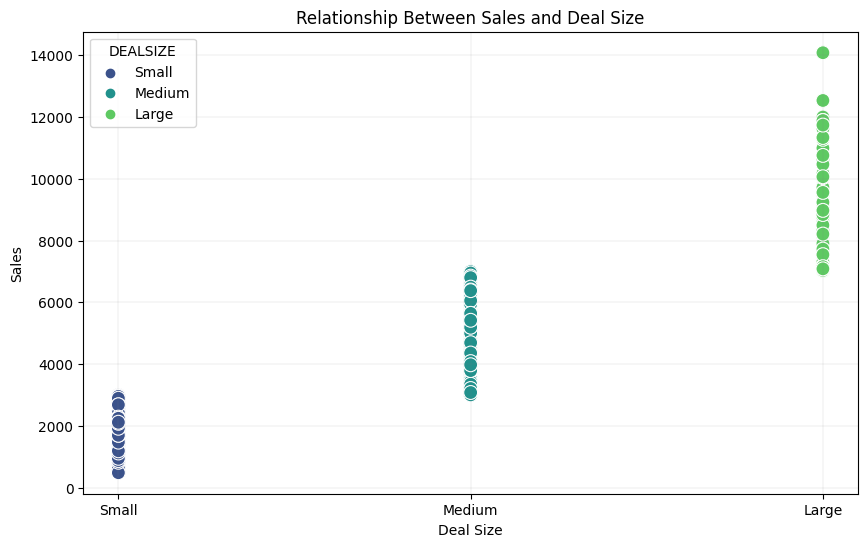

In [46]:
# Create the scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='DEALSIZE', y='SALES', data=df, hue='DEALSIZE', palette='viridis', s=100)
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.title('Relationship Between Sales and Deal Size')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()

b) This scatter plot shows visualisaton of the relationship between sales and quantity ordered with different deal sizes indicated by color.
* Small Deals(Blue Cluster) : These deals are the less frequent than medium deal, but they have lower sales values and involve smaller to moderate quantities.
* Medium Deals (Dark Green Cluster): The medium deal cluster is more frequent but has moderate sales values and moderate order quantities. 
* Large Deals (Green Cluster): These deals are less common but reach the highest values in both sales and quantity ordered. 

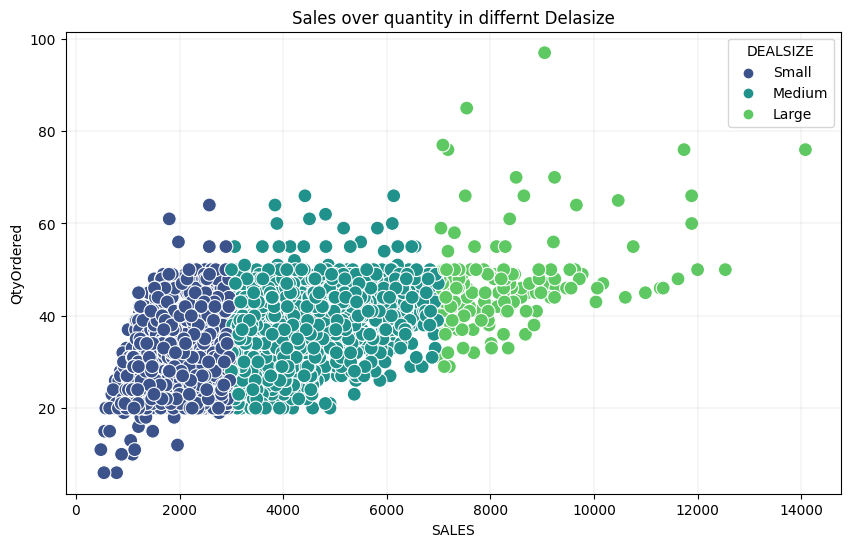

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SALES', y='QUANTITYORDERED',hue='DEALSIZE',data=df, palette='viridis', s=100)
plt.xlabel('SALES')
plt.ylabel('QtyOrdered')
plt.title('Sales over quantity in differnt Delasize')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show();


# Step 4: Data Analysis
1. Analyse the sales data by grouping and aggregating the data based on different factors, such as product, region, or date.

To analyze the sales data by grouping and aggregating based on different factors like product, region, or date, we will use pandas' groupby function along with aggregation methods.

* Grouping by Product: Aggregate the total sales for each product.
* Grouping by Region: Aggregate the total sales for each region.
* Grouping by Date: Aggregate the total sales for each year, month, or quarter.

In [48]:
# a) Grouping and aggregating by product
sales_by_product = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
sales_by_product

,PRODUCTLINE,SALES
0,Classic Cars,3919615.66
1,Motorcycles,1166388.34
2,Planes,975003.57
3,Ships,714437.13
4,Trains,226243.47
5,Trucks and Buses,1127789.84
6,Vintage Cars,1903150.84


The bar plot represents total sales for six different product lines(Classic Cars, Motorcycles, Planes, Ships, Trains, and Trucks and Buses),

* Classic Cars have the highest total sales, close to 4 million.
* Vintage Cars follow with a value slightly below 2 million.
* Motorcycles, Planes, and Ships have intermediate sales values.
* Trucks and Buses have moderate sales, while Trains have the lowest sales (just above zero).

In summary, this chart visually shows how different product lines perform in terms of total sales. Classic Cars and Vintage Cars are the top performers, while Trains lag behind.

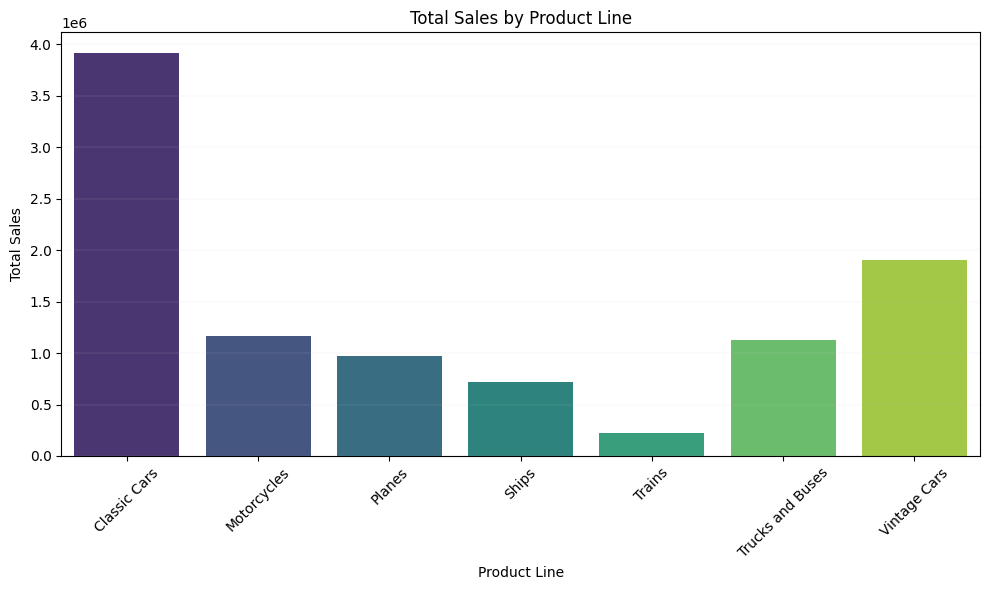

In [49]:
# Bar Plot for Sales by Product:
plt.figure(figsize=(10,6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=sales_by_product, palette='viridis')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='lightgray', linestyle='-', linewidth=0.1)
plt.show()

In [50]:
# b) Grouping and aggregating by region
sales_by_region = df.groupby('TERRITORY')['SALES'].sum().reset_index()
sales_by_region

,TERRITORY,SALES
0,APAC,1201295.05
1,EMEA,4979272.41
2,North America,3852061.39


 This pie chart represents sales distribution across different regions
* North America (38.4%): This slice represents the proportion of sales from North America. It’s the largest slice, indicating that North America contributes the most to the overall sales.
* EMEA (Europe, the Middle East, and Africa) (49.6%): The EMEA slice is the second largest. It shows that this region accounts for nearly half of the total sales.
* APAC (Asia-Pacific) (12.0%): The smallest slice represents APAC. It contributes the least to the overall sales volume.

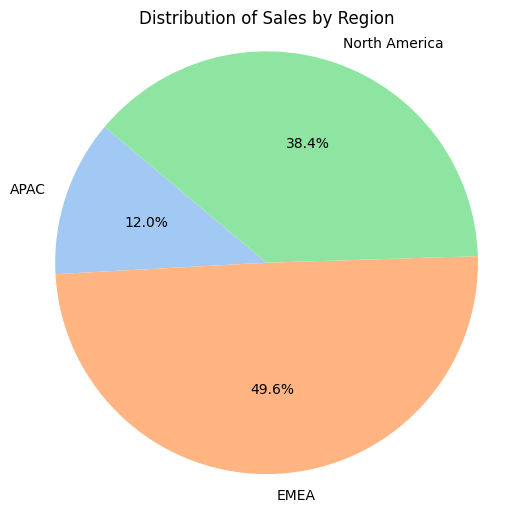

In [51]:
# Pie Chart for Sales by Region:
plt.figure(figsize=(6,6))
plt.pie(sales_by_region['SALES'], labels=sales_by_region['TERRITORY'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Sales by Region')

plt.show()

In [52]:
# c) Grouping and aggregating by date(Year)
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum().reset_index()
sales_by_year

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


The bar plot represents total sales by year. On the x-axis, years are represented from 2002.5 to 2005.5, with intervals of one year, approximately corresponding to 2003, 2003.5, 2004, 2004.5, and 2005. 

The graph illustrates that 2004 had the highest total sales, whereas 2005 had the lowest.

Visually, the graph depicts the sales performance over the specified timeframe.

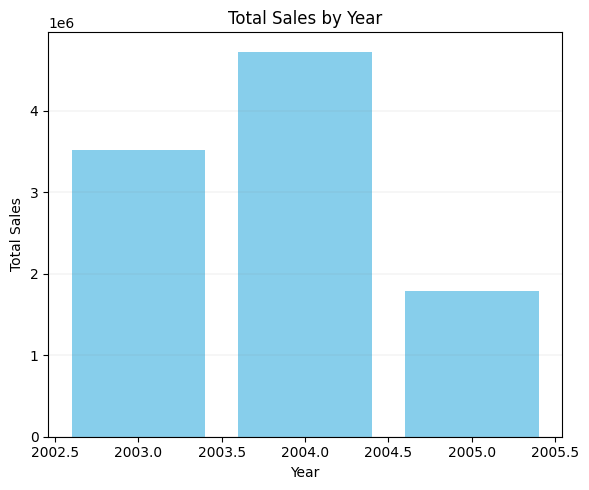

In [53]:
# Bar plot for sales by year
plt.figure(figsize=(6, 5))
plt.bar(sales_by_year['YEAR_ID'], sales_by_year['SALES'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.tight_layout()
plt.show()

In [54]:
# Grouping and aggregating by date(Month)
sales_by_Month = df.groupby('MONTH_ID')['SALES'].sum().reset_index()
sales_by_Month

,MONTH_ID,SALES
0,1,785874.44
1,2,810441.90
2,3,754501.39
3,4,669390.96
4,5,923972.56
5,6,454756.78
6,7,514875.97
7,8,659310.57
8,9,584724.27
9,10,1121215.22


The bar plot represents total sales by month. On the x-axis, months of the year are numbered from 1 to 12, with each bar corresponding to the total sales for that month. The y-axis represents "Total Sales," ranging from 0 to 2,000,000 in increments of 250,000, where each unit represents a quarter million in sales.

This graph visually depicts sales data over time, enabling us to identify trends or patterns.

Month 11 shows a significant spike in sales, nearly reaching the maximum value on the vertical axis. In contrast, month 6 exhibits the lowest sales. Additionally, months 5 and 10 show moderately high sales compared to other months.

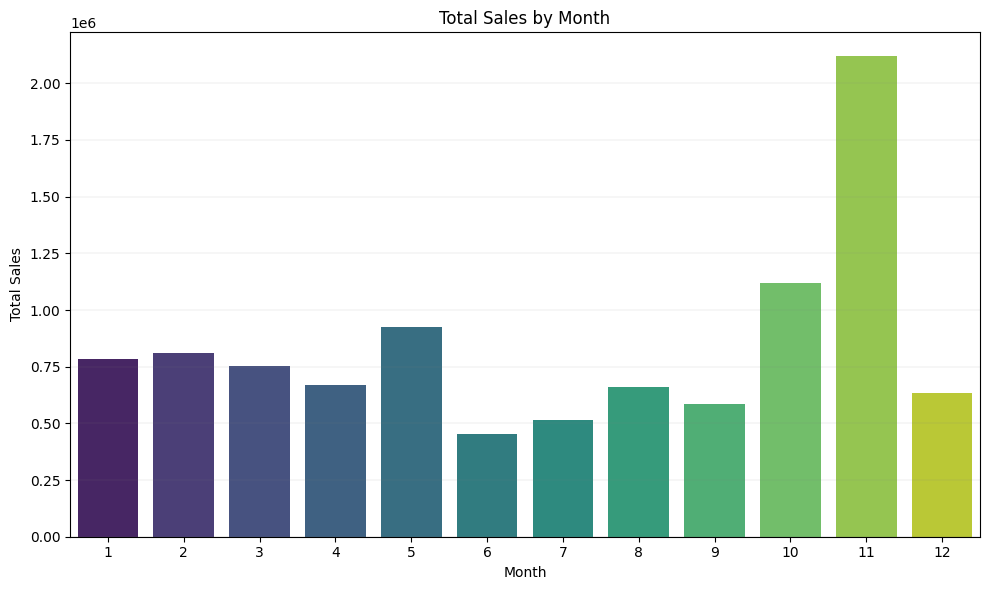

In [55]:
# Line Plot for Sales Over Time:
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH_ID', y='SALES', data=sales_by_Month, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

In [56]:
# Grouping and aggregating by date(Quarter)
sales_by_quarter = df.groupby('QTR_ID')['SALES'].sum().reset_index()
sales_by_quarter

,QTR_ID,SALES
0,1,2350817.73
1,2,2048120.30
2,3,1758910.81
3,4,3874780.01


a) The bar plot represents total sales by quarter. On the x-axis, quarters are numbered from 1 to 4, with each bar corresponding to the total sales for that quarter. The y-axis represents "Total Sales," ranging from 0 to 4 million.

The graph shows that quarter 4 had the highest total sales, whereas quarter 3 had the lowest.

Visually, the graph effectively illustrates the sales performance over the specified timeframe, highlighting the variations in sales across different quarters.

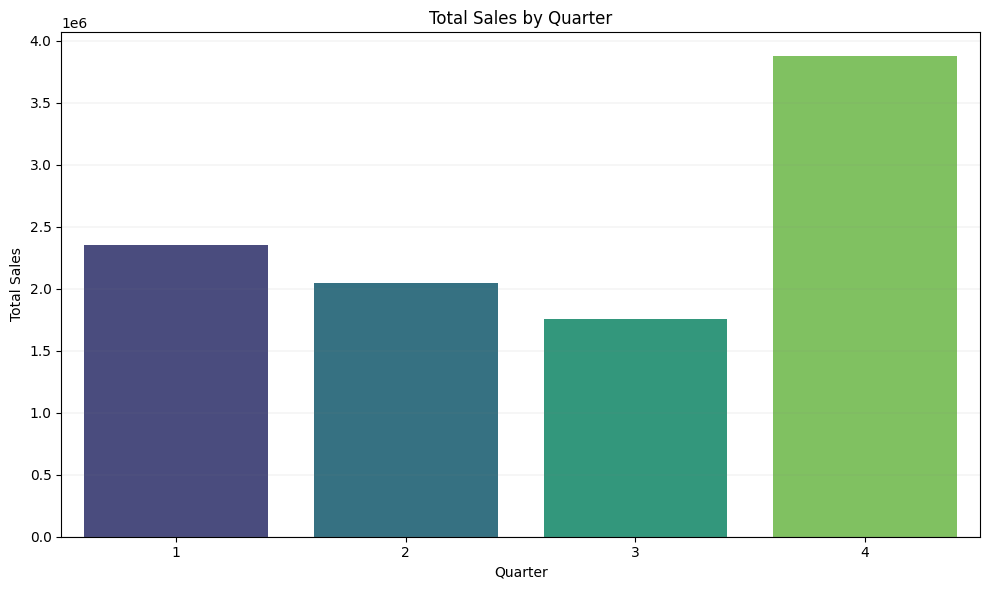

In [57]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='QTR_ID', y='SALES', data=sales_by_quarter, palette='viridis')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

b) To calculate quarters from orderdate if quarter id column not available.

In [58]:
# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) #Ensures ORDERDATE is recognized as datetime values.

# Group by year and quarter and calculate total sales
sales_by_quarter = df.groupby(df['ORDERDATE'].dt.to_period('Q'))['SALES'].sum().reset_index()
sales_by_quarter 

,ORDERDATE,SALES
0,2003Q1,445094.69
1,2003Q2,562365.22
2,2003Q3,649514.54
3,2003Q4,1860005.09
4,2004Q1,833730.68
5,2004Q2,766260.73
6,2004Q3,1109396.27
7,2004Q4,2014774.92
8,2005Q1,1071992.36
9,2005Q2,719494.35


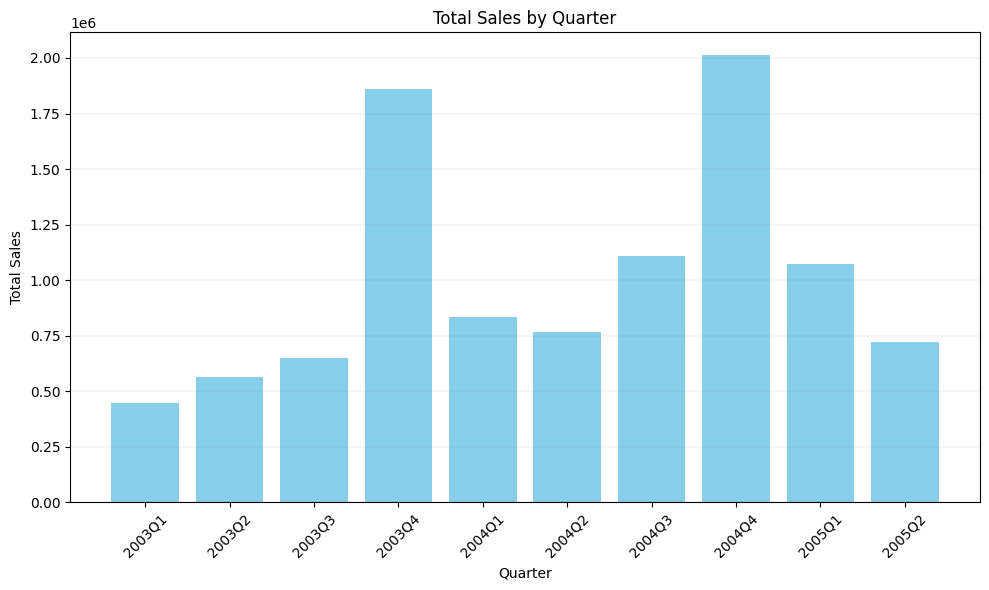

In [59]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_quarter['ORDERDATE'].astype(str), sales_by_quarter['SALES'], color='skyblue')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quarter')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

2. Calculate the percentage of quantity Ordered contributed by Productline:

To calculate the percentage of quantity Ordered contributed by Product,
* Group and Aggregate Data: Group the data by productline and sum up the quantity Ordered for productline.
* Calculate Total Sales: Compute the total quantity Ordered across all productlines.
* Compute Percentages: Divide the quantity Ordered for productline by the total sales and multiply by 100 to get the percentage contribution.


In [60]:
# Group by product line and calculate total_quantity_order
quantity_order_by_productline = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index()

# Calculate total_quantity_order across all product lines
total_quantity_order = quantity_order_by_productline['QUANTITYORDERED'].sum()

# Calculate percentage contribution of each product line
quantity_order_by_productline ['QUANTITYORDERED_PERCENTAGE'] = ((quantity_order_by_productline['QUANTITYORDERED'] / total_quantity_order) * 100).round(2)
quantity_order_by_productline 

,PRODUCTLINE,QUANTITYORDERED,QUANTITYORDERED_PERCENTAGE
0,Classic Cars,33992,34.31
1,Motorcycles,11663,11.77
2,Planes,10727,10.83
3,Ships,8127,8.20
4,Trains,2712,2.74
5,Trucks and Buses,10777,10.88
6,Vintage Cars,21069,21.27


This bar chart represents total sales for six different product lines(Classic Cars, Motorcycles, Planes, Ships, Trains, and Trucks and Buses),

* Classic Cars have the highest total sales, close to 3.5 million.
* Vintage Cars follow with a value slightly above 2 million.
* Motorcycles, Planes, and Ships have intermediate sales values.
* Trucks and Buses have moderate sales, while Trains have the lowest sales (just above zero).

In summary, this chart visually shows how different product lines perform in terms of total sales. Classic Cars and Vintage Cars are the top performers, while Trains lag behind.

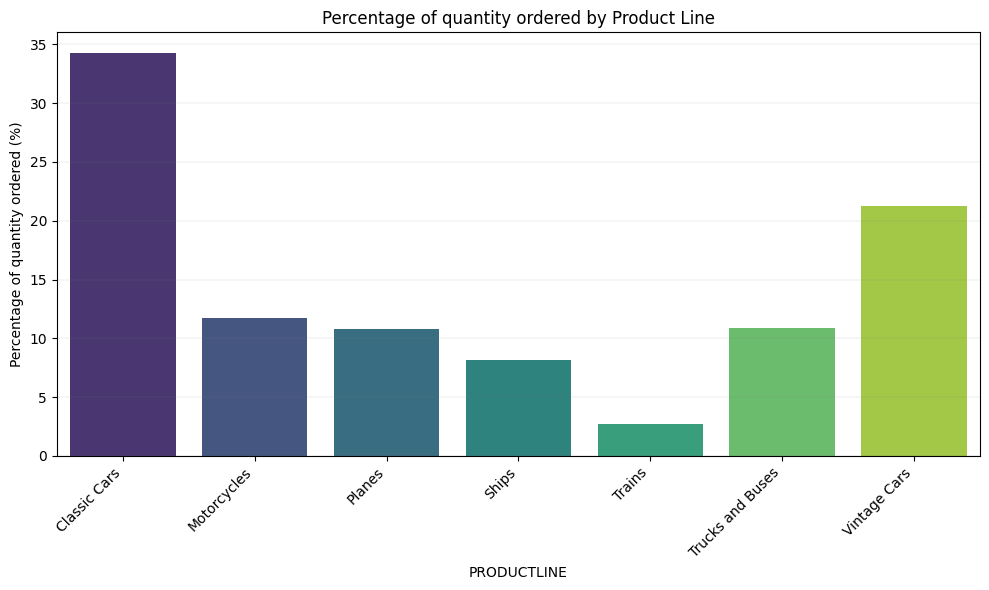

In [61]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='PRODUCTLINE', y='QUANTITYORDERED_PERCENTAGE', data=quantity_order_by_productline , palette='viridis')
plt.xlabel('PRODUCTLINE')
plt.ylabel('Percentage of quantity ordered (%)')
plt.title('Percentage of quantity ordered by Product Line')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

3. Analyse the performance of different products in terms of MSRP:

In [62]:
# Grouping and aggregating by product line to calculate the average MSRP
msrp_by_productline = df.groupby('PRODUCTLINE')['MSRP'].mean().round(2).reset_index()
msrp_by_productline 

,PRODUCTLINE,MSRP
0,Classic Cars,119.89
1,Motorcycles,97.07
2,Planes,88.77
3,Ships,86.13
4,Trains,72.99
5,Trucks and Buses,102.47
6,Vintage Cars,86.46


The bar graph titled “Average MSRP by Product Line” compares the average Manufacturer’s Suggested Retail Price (MSRP) across different product lines. Here are the key takeaways:

* Classic Cars: Highest average MSRP, indicating they are likely the most premium or collectible items.
* Trucks and Buses: Next highest MSRP values, suggesting these are also premium offerings but slightly more affordable than classic cars.
* Vintage Cars, Motorcycles, Planes & Ships: Moderate average MSRP, which could reflect a mid-range market position with slight variation.
* Trains: Lowest average MSRP, implying these are the most economical options in the product lineup.

This graph helps in understanding the pricing strategy and market positioning of the various product lines. 

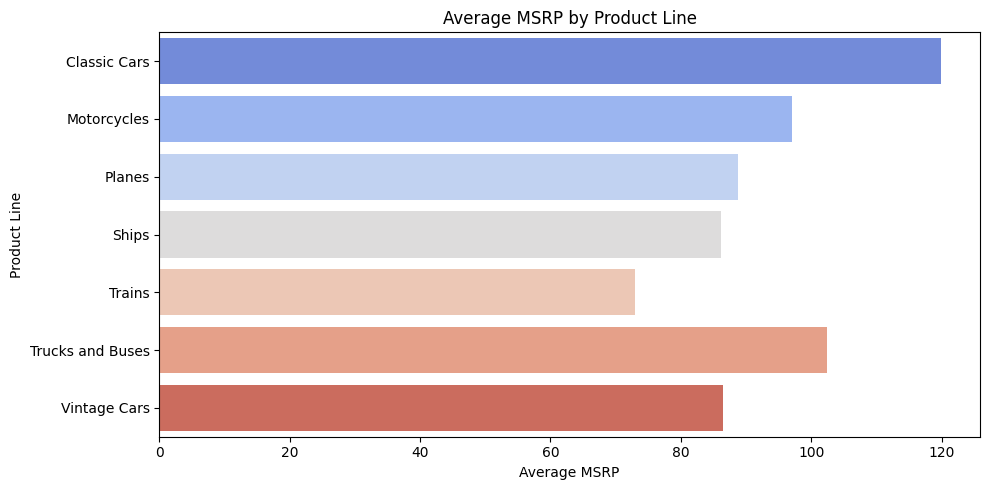

In [63]:
# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x='MSRP', y='PRODUCTLINE', data=msrp_by_productline, palette='coolwarm')
plt.xlabel('Average MSRP')
plt.ylabel('Product Line')
plt.title('Average MSRP by Product Line')
plt.tight_layout()
plt.show()

4. Calculate the correlation between sales and dealsize.
To calculate the correlation between sales and deal size, we can use the **corr()** method in pandas. This method computes the correlation between two numerical columns in a DataFrame.
* Convert DEALSIZE to Numerical Values: The DEALSIZE column is converted to numerical values using a mapping dictionary (deal_size_mapping). This step is necessary because correlation calculations require numerical inputs.
* Calculate Correlation: The corr() method is used to calculate the correlation between SALES and the numerical representation of DEALSIZE.
* Visualize the Correlation: 

In [64]:
# Convert DEALSIZE to numerical values for correlation calculation
deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['DEALSIZE_NUM'] = df['DEALSIZE'].map(deal_size_mapping)

# Calculate correlation
correlation = df['SALES'].corr(df['DEALSIZE_NUM']).round(2)
print(f"Correlation between SALES and DEALSIZE: {correlation}")


Correlation between SALES and DEALSIZE: 0.86


The scatter plot graph shows the relationship between deal size and sales.


* Each point on the graph corresponds to a sale, positioned according to its deal size and sales amount.
* The line of best fit indicates a positive correlation; as deal size increases, sales amount tends to increase as well.
* This suggests that larger deals are more lucrative, potentially guiding a strategy to focus on securing larger deals to boost sales.

In summary, the correlation between deal size and sales suggests that bigger deals contribute more significantly to sales, which could inform a strategic shift towards prioritizing larger deals to enhance overall sales performance.This graph is useful for visualizing sales data and can inform decisions on targeting different deal sizes to maximize revenue.

/tmp/ipykernel_18/2287920840.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='DEALSIZE_NUM', y='SALES', data=df, palette='viridis', s=100, alpha=1)


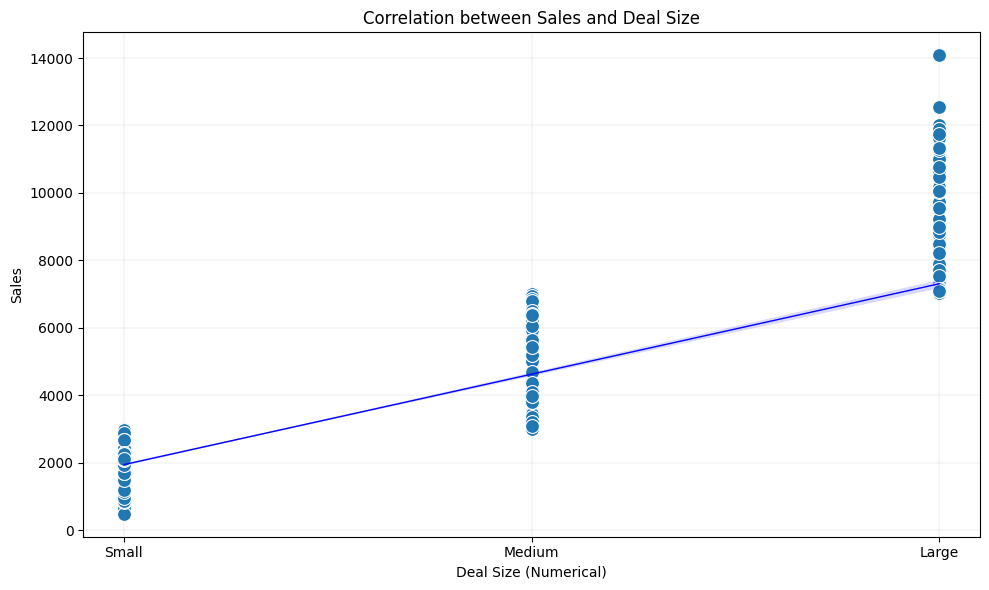

In [65]:
# Visualize the correlation : 
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEALSIZE_NUM', y='SALES', data=df, palette='viridis', s=100, alpha=1)
sns.regplot(x='DEALSIZE_NUM', y='SALES', data=df, scatter=False, color='blue', line_kws={"linewidth": 1})

plt.xlabel('Deal Size (Numerical)')
plt.ylabel('Sales')
plt.title('Correlation between Sales and Deal Size')
plt.xticks(ticks=[1, 2, 3], labels=['Small', 'Medium', 'Large'])
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.tight_layout()
plt.show()

5. Identify the top-performing (top 3) products in terms of sales year on year.
To identify the top-performing products in terms of sales year on year, 
* Group the data by year and product to calculate the total sales for each product in each year.
* Sort the data within each year to find the top 3 products.
* Filter the data to get the top 3 products for each year.

In [66]:
# Group by year and product, then sum the sales
grouped_sales = df.groupby(['YEAR_ID', 'PRODUCTCODE'])['SALES'].sum().reset_index()

# Sort the sales within each year
grouped_sales_sorted = grouped_sales.sort_values(['YEAR_ID', 'SALES'], ascending=[True, False])

# Get the top 3 products for each year
top_products_per_year = grouped_sales_sorted.groupby('YEAR_ID').head(3)

top_products_per_year

,YEAR_ID,PRODUCTCODE,SALES
39,2003,S18_3232,111945.98
1,2003,S10_1949,72913.27
7,2003,S12_1108,67771.69
148,2004,S18_3232,121105.26
110,2004,S10_1949,86832.25
116,2004,S12_1108,82470.59
257,2005,S18_3232,55194.18
294,2005,S24_3856,32432.64
219,2005,S10_1949,31327.51


a) The chart shows total sales for four product codes across 2003, 2004, and 2005, with bars representing the top 3 products each year based on sales.

2003: S18_3232 had the highest sales, followed by S10_1949 and S12_1108.
2004: S18_3232 maintained its lead, and both S10_1949 and S12_1108 showed growth.
2005: S18_3232 and S10_1949 saw a decline, with S24_3856 having the lowest sales.

The trends indicate that S18_3232 consistently performed well, while S10_1949 and S12_1108 fluctuated. S24_3856 struggled throughout the period.

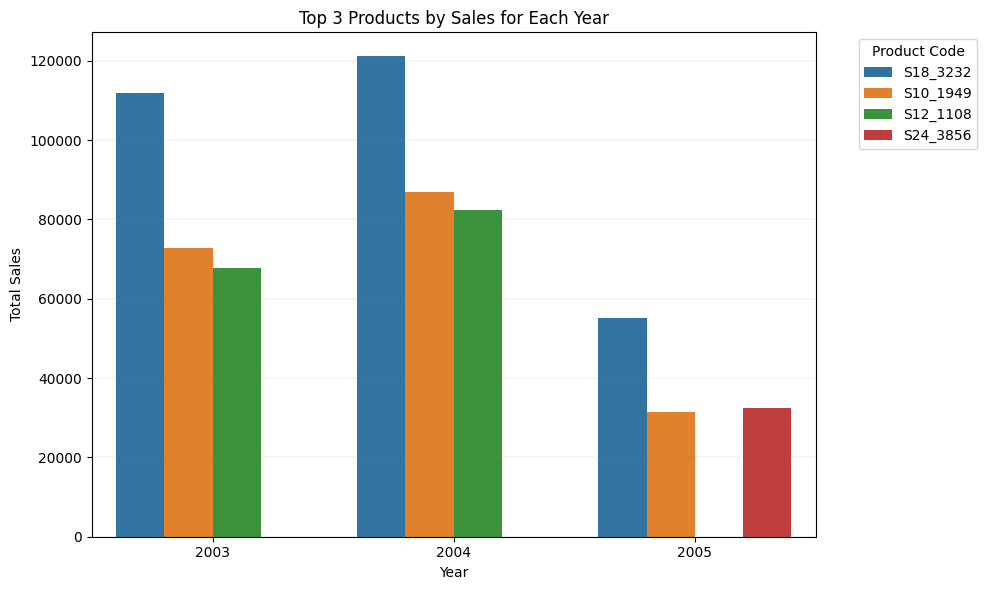

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x='YEAR_ID', y='SALES', hue='PRODUCTCODE', data=top_products_per_year)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Top 3 Products by Sales for Each Year')
plt.legend(title='Product Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

b) The stacked bar chart titled “Top 3 Products by Sales Year on Year” provides a visual representation of sales data over three years—2003, 2004, and 2005. Here’s a detailed explanation:

* Vertical Bars: Each bar corresponds to a year and is segmented by color to represent different products.
* Product Codes: Identified by colors in the legend (e.g., S10_1949, S12_1108).
* Sales Values: Each segment within a bar shows the sales value for that product in the respective year.

Key observations:

* 2003: Sales decrease compared to 2004 but are still higher than 2005.
* 2004: There’s a significant increase in total sales across all products.
* 2005: The total sales are the lowest of the three years.

This chart is useful for analyzing business growth, product popularity, and planning future production or marketing strategies

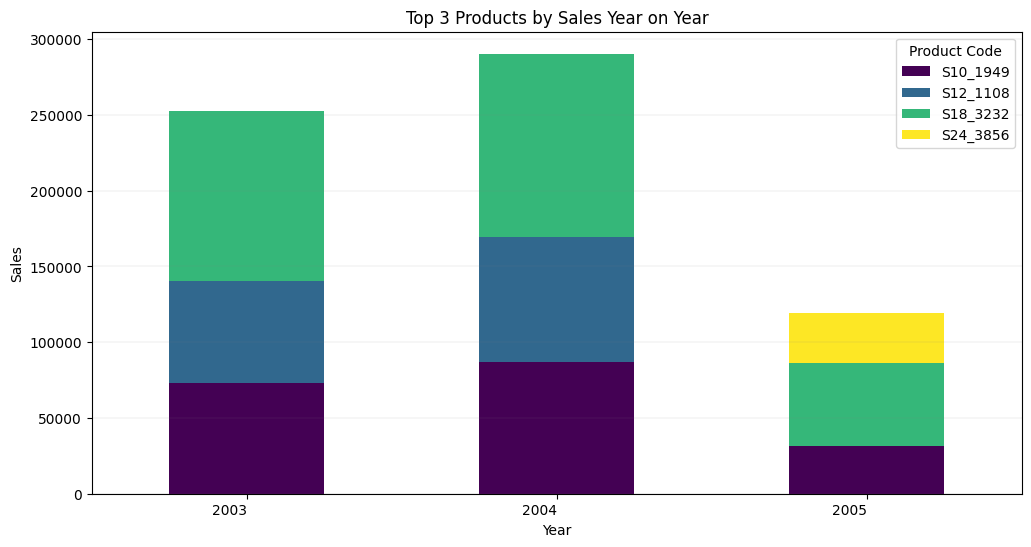

In [68]:
pivot_table = top_products_per_year.pivot(index='YEAR_ID', columns='PRODUCTCODE', values='SALES').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Top 3 Products by Sales Year on Year')
plt.legend(title='Product Code')
plt.xticks(rotation=0, ha='right')
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

c) The heatmap visualizes the top 3 products by sales year over year, using shades of blue and green to depict sales figures. Here’s a breakdown:

Darker shades of blue and green represent higher sales figures.
The x-axis lists product IDs (e.g., S10_1949, S12_1108), while the y-axis lists years (2003 to 2005).
Each cell in the grid shows the sales of a specific product in a particular year.
* High Sales: Dark blue cells indicate top-selling products for that year.
* Moderate Sales: Lighter shades of blue or green indicate moderate sales.
* Low/No Sales: Cells with ‘0’ or very light shades indicate low or no sales.

This heatmap offers a clear visual comparison of product performance over time, highlighting products that consistently perform well and those that may require strategic adjustments to enhance sales.

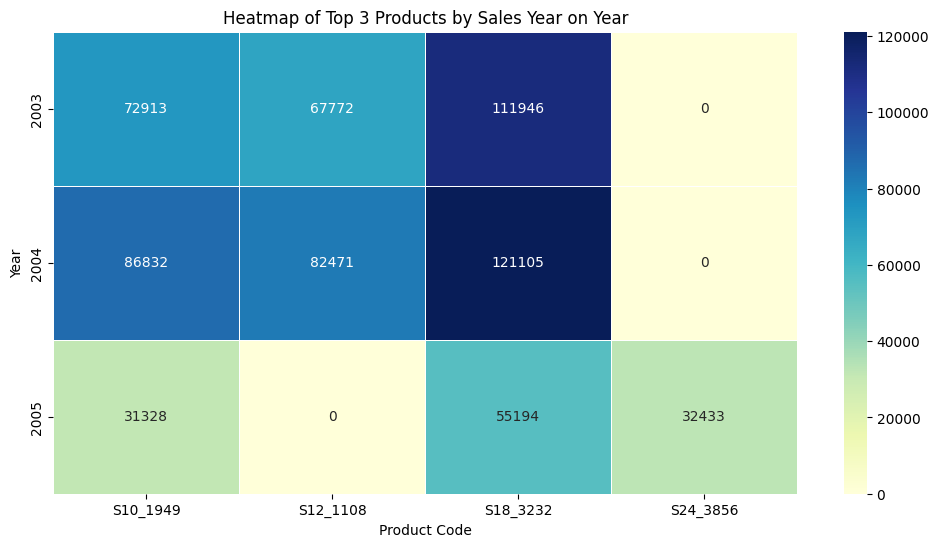

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=.5)
plt.xlabel('Product Code')
plt.ylabel('Year')
plt.title('Heatmap of Top 3 Products by Sales Year on Year')
plt.show()

6. Calculate the percentage of sales contributed by the top-performing products.

To calculate the percentage of sales contributed by the top-performing products, we can follow these steps:
* Calculate the total sales for each product.
* Identify the top-performing products.
* Calculate the total sales for the top-performing products.
* Calculate the percentage of total sales contributed by these top-performing products.

In [70]:
# Step 1: Calculate the total sales for each product
total_sales_per_product = df.groupby('PRODUCTCODE')['SALES'].sum().reset_index()

# Step 2: Identify the top-performing products (e.g., top 3)
top_products = total_sales_per_product.nlargest(3, 'SALES')

# Step 3: Calculate the total sales for the top-performing products
total_sales_top_products = top_products['SALES'].sum()

# Step 4: Calculate the percentage of sales contributed by the top-performing products
total_sales_all_products = df['SALES'].sum()
percentage_contributed = ((total_sales_top_products / total_sales_all_products) * 100).round(2)

print(f"The top-performing products contribute {percentage_contributed:.2f}% of the total sales.")

The top-performing products contribute 6.48% of the total sales.


a) The pie chart titled “Sales Contribution of Top-Performing Products” illustrates the sales distribution among three products:

S18_3232: Largest segment, blue, representing 44.4% of total sales.
S10_1949: Second segment, orange, accounting for 29.4% of sales.
S10_4698: Smallest segment, green, with 26.2% of sales.

This chart helps in understanding which products contribute most to sales and can guide decisions on inventory, marketing, and product development strategies.

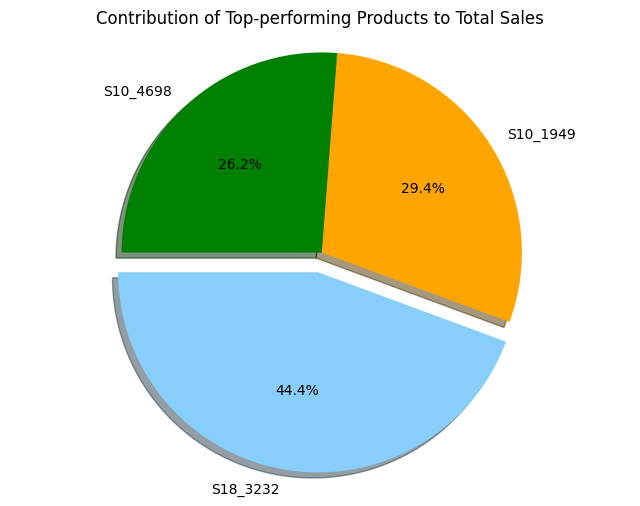

In [71]:
# Visualize with a pie chart
labels = top_products['PRODUCTCODE']
sizes = top_products['SALES']
colors = ['lightskyblue', 'orange', 'green']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Contribution of Top-performing Products to Total Sales')
plt.show()

7.	Analyse the performance of different regions in terms of sales and dealsize.
To analyze the performance of different regions in terms of sales and deal size, we can follow these steps:
* Group and aggregate the data by region.
* Calculate total sales and average deal size for each region.
* Visualize the results using appropriate graphs like bar plots or scatter plots.

In [72]:
# Convert DEALSIZE to numerical values for correlation calculation
deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['DEALSIZE_NUM'] = df['DEALSIZE'].map(deal_size_mapping)

# Aggregate the total sales and average dealsize by region
sales_dealsize_by_region = df.groupby('TERRITORY').agg(
    total_sales=('SALES', 'sum'),
    avg_dealsize=('DEALSIZE_NUM', 'mean')
).reset_index()

sales_dealsize_by_region 

,TERRITORY,total_sales,avg_dealsize
0,APAC,1201295.05,1.552632
1,EMEA,4979272.41,1.597726
2,North America,3852061.39,1.621974


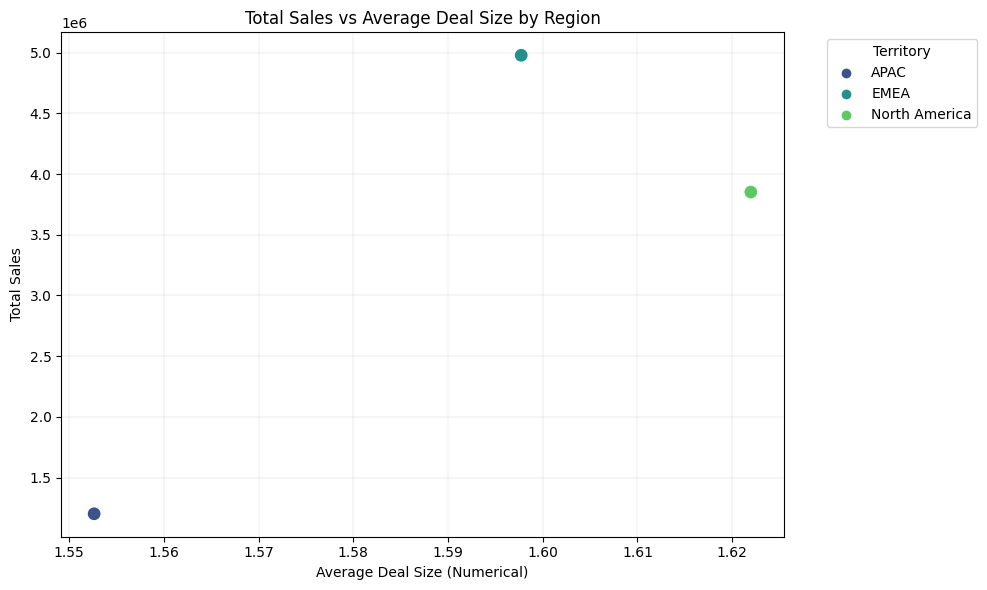

In [73]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_dealsize', y='total_sales', hue='TERRITORY', data=sales_dealsize_by_region, palette='viridis', s=100)
plt.xlabel('Average Deal Size (Numerical)')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Average Deal Size by Region')
plt.legend(title='Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()


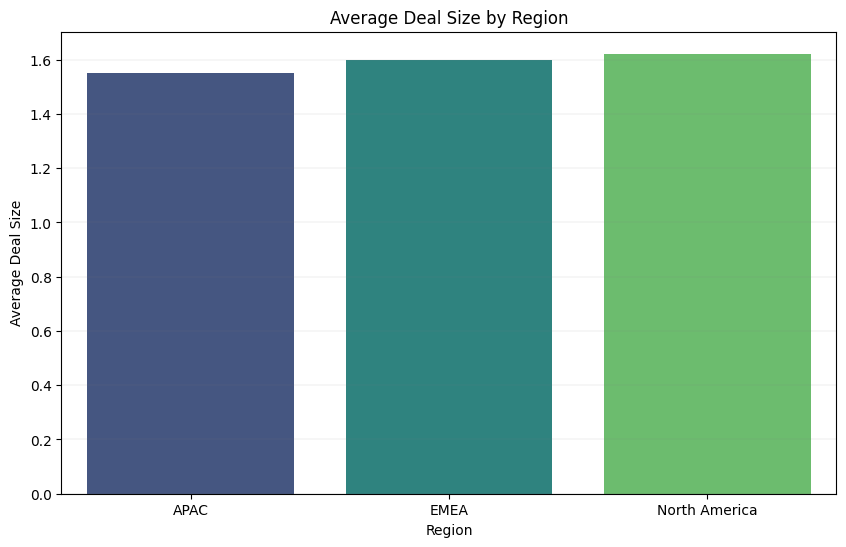

In [74]:
# Bar plot for average dealsize by region
plt.figure(figsize=(10, 6))
sns.barplot(x='TERRITORY', y='avg_dealsize', data=sales_dealsize_by_region, palette='viridis')
plt.xlabel('Region')
plt.ylabel('Average Deal Size')
plt.title('Average Deal Size by Region')
plt.xticks(rotation=0)
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

# Step 5: Key Questions to Answer

1. What is the overall trend of sales over time?


This pair graph contains two line graphs, each offering insights into sales trends over different time frames.

**Annual Sales Trend:**
* The graph shows sales increasing from 2003 to 2004 but sharply declining from 2004 to 2005.
* It starts around 3.5 and ends below 2, indicating a significant drop in annual sales.
* This suggests ongoing challenges that have led to consistent yearly declines.

**Monthly Sales Trend:**
* This graph illustrates sales fluctuations over a twelve-month period.
* Sales vary between approximately 3000 and just above 4000.
* The shaded area around the trend line shows the data range, reflecting monthly sales uncertainty and variability.
* Factors like seasons, market conditions, or other variables influence these fluctuations.

Together, these graphs offer a complete view of sales performance, highlighting both long-term downward trends and short-term sales variability. This information can guide strategic decisions by providing insights into market conditions and performance trends over different time scales.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

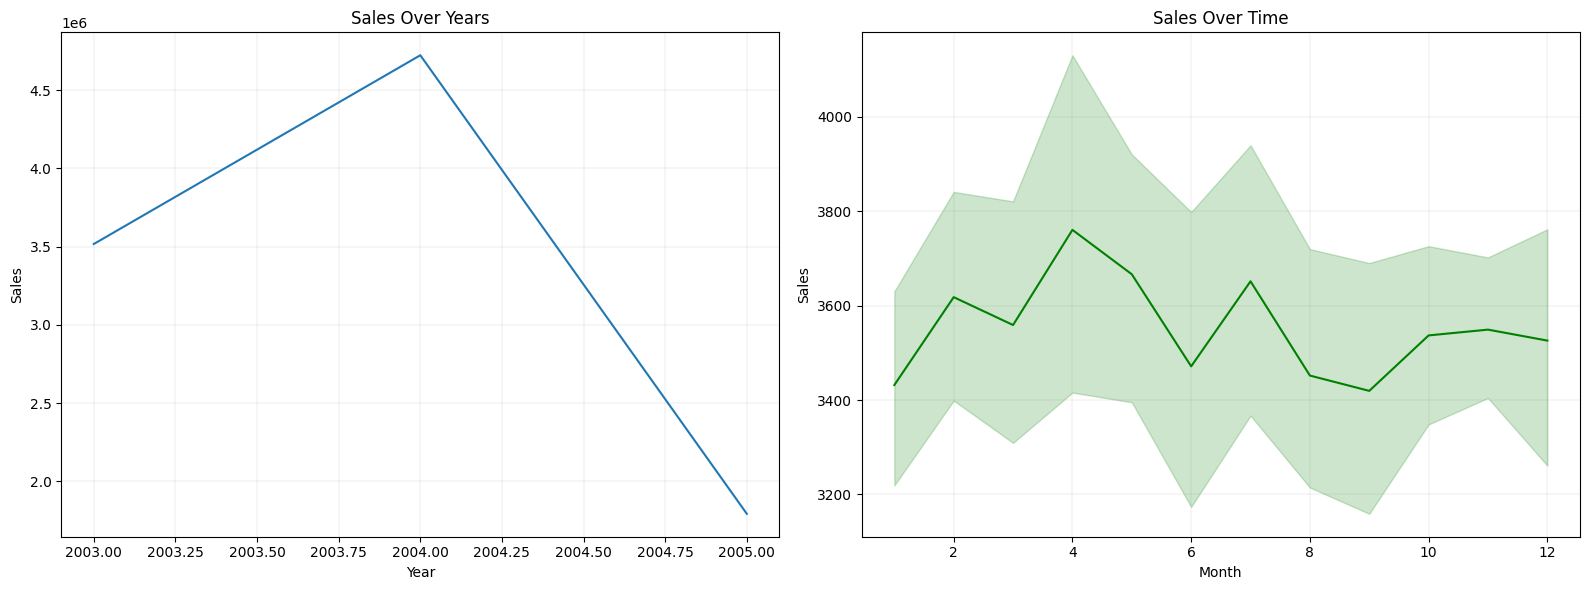

In [75]:
# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting annual sales trend
sns.lineplot(x='YEAR_ID', y='SALES', data=pivot_table_sales, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales')
ax1.set_title('Sales Over Years')
ax1.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

# Plotting monthly sales trend
sns.lineplot(x='MONTH_ID', y='SALES', data=df, ax=ax2, color='Green')
ax2.set_xlabel('Month')
ax2.set_ylabel('Sales')
ax2.set_title('Sales Over Time')
ax2.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

plt.tight_layout()
plt.show()

2. Which products have the highest sales?

The bar chart titled “Top 10 Products by Sales” visually represents the sales performance of various products. Each vertical bar corresponds to a product identified by its product number, with the height of the bar indicating the total sales amount.

The tallest bar represents product number “S18_3232,” indicating it has the highest sales among the top 10 products, highlighting its popularity or demand in the market. Conversely, the shortest bars correspond to products “S24_3856, S12_2823, S18_1662, and S12_1099,” reflecting their lower sales and suggesting they are less popular.

Overall, the chart shows a gradual decline in sales from the highest-selling product towards the last four products, which exhibit fluctuating sales figures. This variation among the bottom-ranked products indicates similar levels of total sales, suggesting they may benefit from additional marketing efforts or a reassessment of sales strategies.

This visual representation serves as a valuable tool for quickly identifying top-selling products and understanding the relative performance of each product within the top 10, aiding in strategic decision-making and resource allocation.

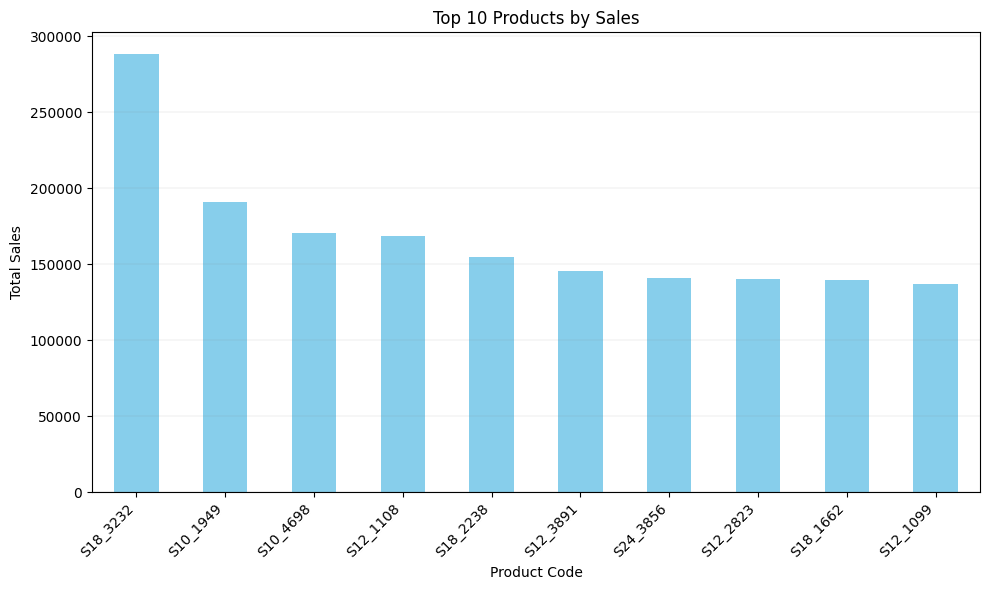

In [76]:
# Calculate total sales per product
total_sales_per_product = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)

# Select top 10 products (adjust as needed)
top_products = total_sales_per_product.head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.show()

3. What is the correlation between sales and dealsize?

The scatter plot shows how sales relate to deal size:

* Each dot represents a sale, positioned by its deal size and sales amount.
* The upward-sloping line suggests that as deal size increases, sales generally increase too.
*  With a strong correlation coefficient of 0.86, focusing on larger deals could boost total sales significantly.
*  Businesses can use this insight to prioritize larger deals, potentially yielding higher revenue.
*  By emphasizing larger deals, businesses can optimize their sales strategy for growth.

In summary, prioritizing larger deals aligns with the data, offering a path to enhance overall sales performance and drive revenue growth effectively.




/tmp/ipykernel_18/2979498178.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='DEALSIZE_NUM', y='SALES', data=df, palette='viridis', s=100, alpha=1)


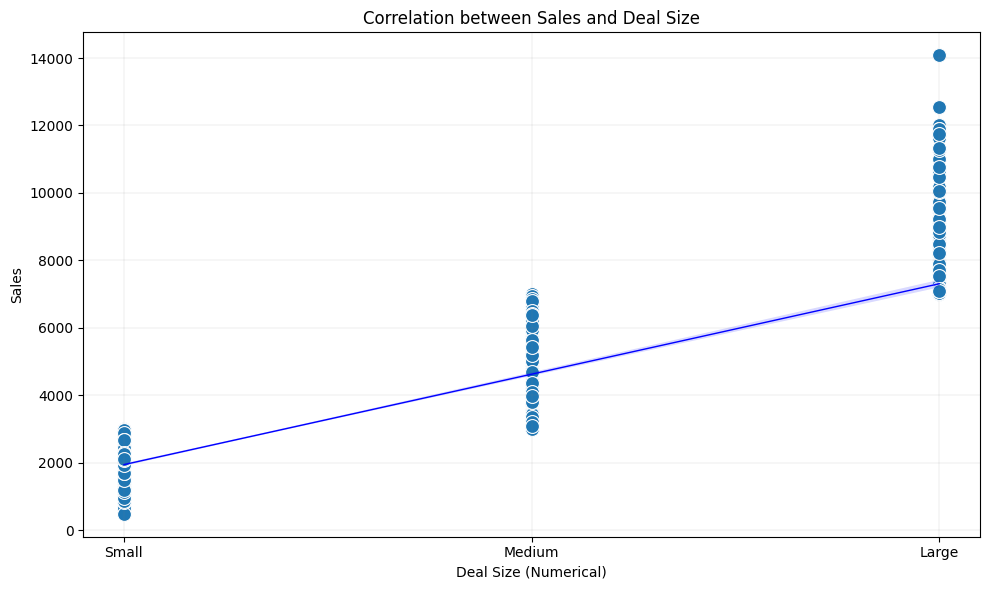

In [77]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEALSIZE_NUM', y='SALES', data=df, palette='viridis', s=100, alpha=1)
sns.regplot(x='DEALSIZE_NUM', y='SALES', data=df, scatter=False, color='blue', line_kws={"linewidth": 1})

plt.xlabel('Deal Size (Numerical)')
plt.ylabel('Sales')
plt.title('Correlation between Sales and Deal Size')
plt.xticks(ticks=[1, 2, 3], labels=['Small', 'Medium', 'Large'])
plt.tight_layout()
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()



4. How do different regions perform in terms of sales and dealsize?

The pair of bar graphs compares total sales and average deal size by region. The first graph, “Total Sales by Region,” shows EMEA leading in sales, followed by North America and APAC. The second graph, “Average Deal Size by Region,” places North America at the top, suggesting it not only has the highest sales volume but also the largest average deals. APAC has the smallest bars in both graphs, indicating lower sales and smaller average deals.

These visual representations are crucial for understanding regional market performance and can influence strategic business decisions, such as where to allocate resources or which markets to focus on for expansion. The consistency of EMEA's higher performance in both total sales and deal size points to a strong market presence and customer base in that region.

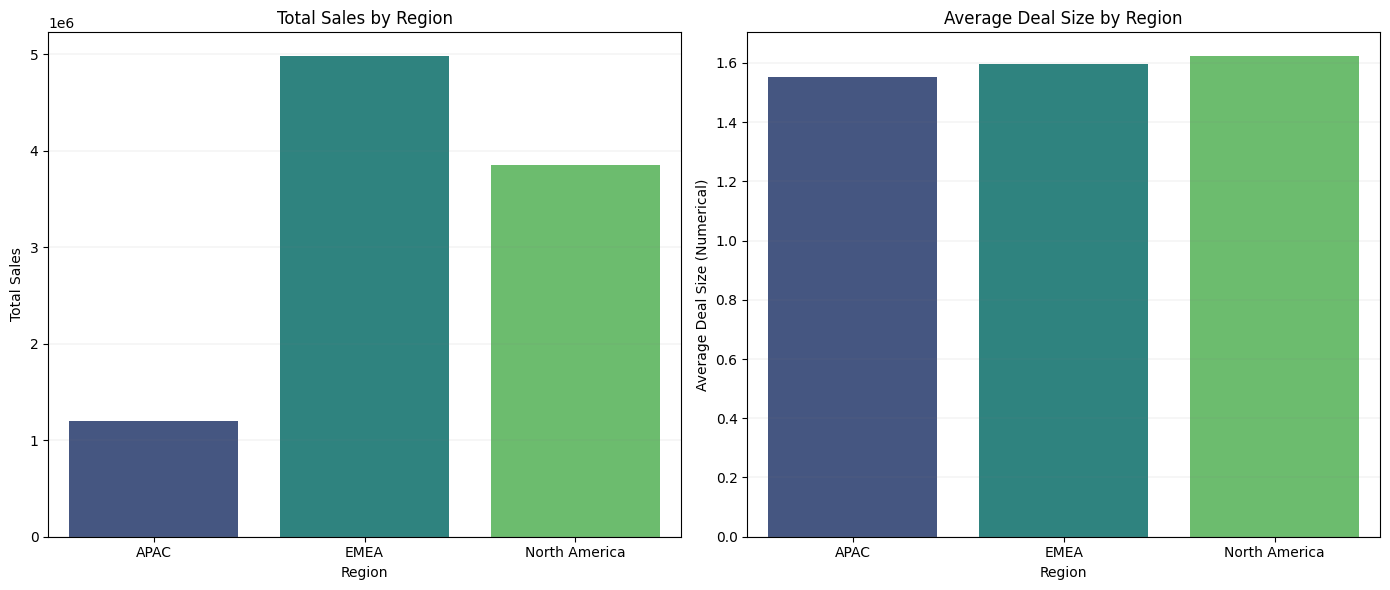

In [78]:
# Convert DEALSIZE to numerical values for average calculation
deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['DEALSIZE_NUM'] = df['DEALSIZE'].map(deal_size_mapping)

# Aggregate total sales and average deal size by region
sales_dealsize_by_region = df.groupby('TERRITORY').agg(
    total_sales=('SALES', 'sum'),
    avg_dealsize=('DEALSIZE_NUM', 'mean')
).reset_index()

# Bar chart for total sales by region
plt.figure(figsize=(14, 6))

# Subplot 1: Total Sales by Region
plt.subplot(1, 2, 1)
sns.barplot(x='TERRITORY', y='total_sales', data=sales_dealsize_by_region, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)

# Subplot 2: Average Deal Size by Region
plt.subplot(1, 2, 2)
sns.barplot(x='TERRITORY', y='avg_dealsize', data=sales_dealsize_by_region, palette='viridis')
plt.title('Average Deal Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Deal Size (Numerical)')
plt.grid(True, which='major', axis='y', color='gray', linestyle='-', linewidth=0.1)
plt.tight_layout()
plt.show()

5. Which products contribute the most to the total sales?

The bar chart titled “Top 10 Products by Sales” provides a detailed comparison of sales figures for ten different products. Each horizontal bar represents a product, identified by a unique color and product code, with the length of the bar corresponding to the total sales.

From the chart, it’s evident that the product coded **S18_3232** leads the group with the highest sales, significantly outperforming the others. This suggests a strong market demand or a successful sales strategy for this particular product. On the other end, the product coded **S12_1099** shows the lowest sales among the top ten, indicating it may not be as popular or well-received in the market.

The outcome of this analysis reveals which products are the bestsellers and which may require additional marketing efforts or strategic review. The results can guide business decisions, such as which products to prioritize for promotion, which to consider discontinuing, or where to focus research and development for future products. Overall, the chart serves as a valuable tool for understanding product performance and making informed business decisions.

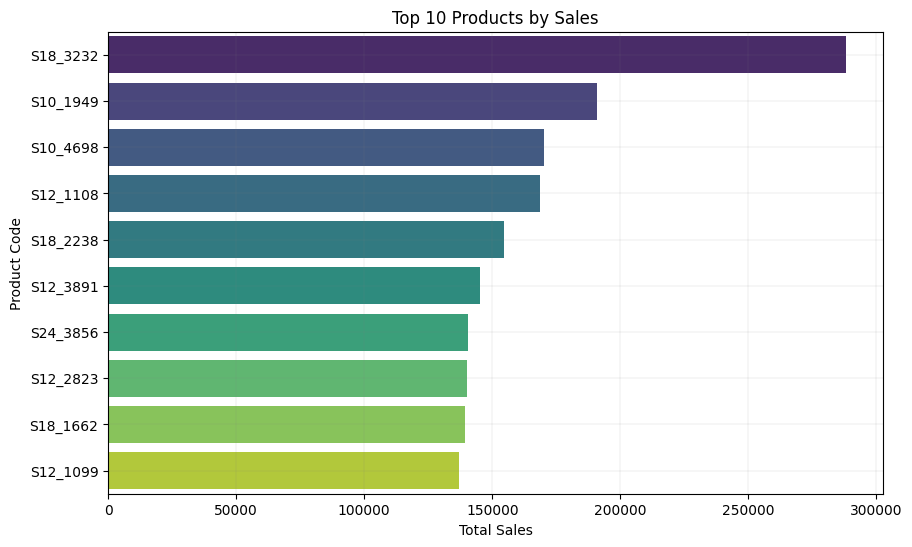

In [79]:
# Calculate total sales per product
total_sales_per_product = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).reset_index()

# Select top 10 products (adjust as needed)
top_products = total_sales_per_product.head(10).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='SALES', y='PRODUCTCODE', data=top_products, palette='viridis')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Code')
plt.grid(True, which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)
plt.show()

# Step 6: Conclusion and Recommendations

1. Summarize your findings and insights from the analysis.

**Sales Trends Over Time:**
* Annual Sales: Sales increased from 2003 to 2004 but declined sharply in 2005, indicating possible external market challenges or operational changes impacting sales negatively.
* Monthly Sales: Sales figures show significant fluctuations throughout the year, suggesting the influence of seasonal factors or varying market conditions.

**Top-Performing Products:**
* S18_3232: This product consistently achieves the highest sales, indicating strong market demand and effective sales strategies.
* S12_1099: This product has the lowest sales among the top 10, suggesting it is less popular or not well-received.

**Regional Sales Performance:**
* EMEA: Leads in total sales, showing a strong market presence.
* North America: Has the highest average deal size, suggesting fewer but larger sales.
* APAC: Shows the lowest sales and deal sizes, indicating potential growth opportunities but current underperformance.

**Correlation Between Deal Size and Sales:**
* Positive Correlation (0.86): Larger deal sizes are strongly associated with higher sales, suggesting that focusing on securing larger deals can significantly boost revenue.
* Product Contribution to Total Sales: The top three products contribute significantly to overall sales, highlighting their importance for revenue generation.

The analysis provides valuable insights into sales trends, product performance, regional market dynamics, and the importance of deal sizes. This information can guide strategic decisions to enhance sales performance and optimize resource allocation.

2. Identify potential areas for further exploration or analysis, such as studying the impact of promotions, seasonality, or customer demographics on sales.

**Impact of Promotions:**
* Promotional Activities Analysis: Examine the effects of various promotional campaigns on sales across different products and regions to identify the most effective strategies.
* Effectiveness of Promotions: Determine which types of promotions (discounts, bundling, limited-time offers) are most successful in increasing sales volumes or deal sizes.

**Seasonality:**
* Seasonal Trends: Study the seasonal trends in sales to pinpoint peak periods and identify off-seasons.
* Strategies for Low Seasons: Develop targeted strategies to boost sales during low seasons, such as special promotions, new product launches, or marketing campaigns aimed at driving demand.

**Customer Demographics:**
* Demographic Analysis: Analyze sales data based on customer demographics (age, gender, location) to identify which segments are driving sales.
* Tailored Marketing Strategies: Create marketing strategies tailored to high-value customer segments to enhance engagement and sales effectiveness.

**Product Performance:**
* Underperforming Products: Investigate why certain products, like S12_1099, are underperforming by examining factors such as market fit, pricing strategies, and competition.
* Improvement Strategies: Consider strategies to improve the performance of underperforming products, including adjustments in pricing, product enhancements, or increased marketing efforts.

Exploring these areas further can provide deeper insights into the factors influencing sales performance and help in developing targeted strategies to maximize revenue and market presence.

3. Provide recommendations based on your analysis that could help improve sales performance.

**Focus on High-Performing Products and Regions:**
* Expand Promotion: Invest in marketing campaigns for top products like S18_3232 to further boost their sales.
* Enhance Presence: Strengthen market presence in EMEA and North America by leveraging their strong performance.

**Improve Underperforming Areas:**
* Market Research: Conduct detailed market research in APAC to understand the reasons for lower sales and smaller deal sizes.
* Tailored Strategies: Develop tailored marketing and sales strategies for underperforming products and regions to increase market penetration and sales.

**Leverage Large Deals:**
* Sales Strategy: Train the sales team to prioritize and close larger deals, given their significant impact on overall sales.
* Incentives: Consider offering incentives for larger purchases to encourage higher deal sizes and maximize revenue.

**Address Seasonality:**
* Seasonal Promotions: Implement seasonal promotions to capitalize on peak periods and mitigate the effects of low seasons.
* Stock Management: Optimize inventory and stock management based on seasonal sales trends to reduce costs and improve efficiency.

**Utilize Data-Driven Insights:**
* Continuous Monitoring: Regularly monitor sales data to identify emerging trends and adjust strategies accordingly.
* Predictive Analytics: Use predictive analytics to forecast sales and plan for future market conditions, ensuring better preparedness and strategic planning.

Implementing these recommendations will help in improving overall sales performance by focusing on high-performing products and regions, addressing underperforming areas, leveraging larger deals, managing seasonality effectively, and utilizing data-driven insights for continuous improvement.